# Obesidade e Estilo de Vida

## Contexto
Este estudo utiliza uma base de dados contendo informações demográficas,
hábitos alimentares e estilo de vida, com o objetivo de entender fatores
associados aos diferentes níveis de obesidade.

## Pergunta central
Quais hábitos e comportamentos estão mais associados aos níveis mais elevados
de obesidade?

## Objetivo
Explorar padrões, relações e possíveis fatores de risco ou proteção
relacionados à obesidade.

# Importações

## Bibliotecas

In [92]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graficos as gr

# arredonda para o inteiro mais próximo
def arredonda_inteiro_mais_proximo(x):
    return np.floor(x + 0.5)

# classe acessória para plotar gráfico de barras empilhadas e gráfico de agrupamento
grafico = gr.Graficos(pd, plt)

A classe Graficos esta sendo utilizada para haver um melhor aproveitamento do espaço e focar mais nas análises e menos no código-fonte.

## Visão inicial dos dados da pesquisa

In [2]:

df_pesquisa  = pd.read_csv("Obesity.csv", sep=",")
df_pesquisa.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Observa-se que a base contém variáveis categóricas relacionadas a hábitos
alimentares, comportamento e estilo de vida, além da variável alvo que indica
o nível de obesidade.


# Preparação

## Da Pesquisa

In [3]:
# transformando o nome das colunas em minúsculo
df_pesquisa.columns = df_pesquisa.columns.str.lower()

df_pesquisa.head()

,gender,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


É transformado todos os títulos das colunas em minúsculas a fim de, obter uma padronização e facilitar a exploração das análises.

In [4]:
print("Total de valores nulos encontrados: ", df_pesquisa.isnull().sum().sum(), "\n")

print("Valore únicos encontrados")
print(df_pesquisa.nunique())

Total de valores nulos encontrados:  0 

Valore únicos encontrados
gender               2
age               1402
height            1574
weight            1525
family_history       2
favc                 2
fcvc               810
ncp                635
caec                 4
smoke                2
ch2o              1268
scc                  2
faf               1190
tue               1129
calc                 4
mtrans               5
obesity              7
dtype: int64


In [5]:
# conversões e arredondamentos

df_pesquisa['age'] = df_pesquisa['age'].astype(int)

for c in ['fcvc', 'ncp', 'ch2o', 'faf', 'tue']:
    df_pesquisa[c] = arredonda_inteiro_mais_proximo(df_pesquisa[c]).astype(int)

df_pesquisa['height'] = round(df_pesquisa['height'] * 100, 0).astype(int) # centímetros
df_pesquisa['weight'] = df_pesquisa['weight'].round(3) # kilogramas

É realizada a conversão do tipo da váriável idade para o tipo inteiro, já outras variáveis tiveram seu arredondamento padronizado seguindo as orientações contidas no dicionário de dados.
A altura ficou definida como um valor inteiro, sendo considerada em centímetros.
O peso ficou definido como float, com 3 dígitos decimais, para que estes representem as gramas.

## Do Dicionário de Dados

In [45]:
dados = [

    # PERFIL DAS PESSOAS
    #===================

    # Gender
    ("gender", "Sexo biológico", "Female", "Feminino"),
    ("gender", "Sexo biológico", "Male", "Masculino"),

    # family_history
    ("family_history", "Histórico familiar de excesso de peso", "yes", "Há histórico"),
    ("family_history", "Histórico familiar de excesso de peso", "no", "Não há histórico"),

    # CARACTERÍSTICAS ALIMENTARES
    #============================

    # FAVC
    ("favc", "Consumo frequente de alimentos altamente calóricos", "yes", "Sim"),
    ("favc", "Consumo frequente de alimentos altamente calóricos", "no", "Não"),

    # FCVC
    ("fcvc", "Frequência de consumo de vegetais nas refeições", 1, "Raramente"),
    ("fcvc", "Frequência de consumo de vegetais nas refeições", 2, "Às vezes"),
    ("fcvc", "Frequência de consumo de vegetais nas refeições", 3, "Sempre"),

    # NCP
    ("ncp", "Número de refeições principais por dia", 1, "Uma refeição"),
    ("ncp", "Número de refeições principais por dia", 2, "Duas refeições"),
    ("ncp", "Número de refeições principais por dia", 3, "Três refeições"),
    ("ncp", "Número de refeições principais por dia", 4, "Quatro ou mais refeições"),

    # CAEC
    ("caec", "Consumo de alimentos entre as refeições", "no", "Não consome"),
    ("caec", "Consumo de alimentos entre as refeições", "Sometimes", "Às vezes"),
    ("caec", "Consumo de alimentos entre as refeições", "Frequently", "Frequentemente"),
    ("caec", "Consumo de alimentos entre as refeições", "Always", "Sempre"),
    
    # ESTILO DE VIDA
    #===============

    # FAF
    ("faf", "Frequência semanal de atividade física", 0, "Nenhuma"),
    ("faf", "Frequência semanal de atividade física", 1, "1–2 vezes"),
    ("faf", "Frequência semanal de atividade física", 2, "3–4 vezes"),
    ("faf", "Frequência semanal de atividade física", 3, "5 vezes ou mais"),

    # TUE
    ("tue", "Tempo diário usando dispositivos eletrônicos", 0, "0–2 horas/dia"),
    ("tue", "Tempo diário usando dispositivos eletrônicos", 1, "3–5 horas/dia"),
    ("tue", "Tempo diário usando dispositivos eletrônicos", 2, "Mais de 5 horas/dia"),

    # MTRANS
    ("mtrans", "Meio de transporte habitual", "Automobile", "Carro"),
    ("mtrans", "Meio de transporte habitual", "Motorbike", "Moto"),
    ("mtrans", "Meio de transporte habitual", "Bike", "Bicicleta"),
    ("mtrans", "Meio de transporte habitual", "Public_Transportation", "Transporte público"),
    ("mtrans", "Meio de transporte habitual", "Walking", "A pé"),

    # COMPORTAMENTOS ADICIONAIS
    #==========================

    # CH2O
    ("ch2o", "Consumo diário de água", 1, "Menos de 1 litro/dia"),
    ("ch2o", "Consumo diário de água", 2, "Entre 1 e 2 litros/dia"),
    ("ch2o", "Consumo diário de água", 3, "Mais de 2 litros/dia"),
    
    # CALC
    ("calc", "Consumo de bebida alcoólica", "no", "Não bebe"),
    ("calc", "Consumo de bebida alcoólica", "Sometimes", "Às vezes"),
    ("calc", "Consumo de bebida alcoólica", "Frequently", "Frequentemente"),
    ("calc", "Consumo de bebida alcoólica", "Always", "Sempre"),
    
    # SMOKE
    ("smoke", "Hábito de fumar", "yes", "Fuma"),
    ("smoke", "Hábito de fumar", "no", "Não fuma"),

    # SCC
    ("scc", "Monitora a ingestão calórica diária", "yes", "Sim"),
    ("scc", "Monitora a ingestão calórica diária", "no", "Não"),

    # TARGET
    #=======
    
    # Obesity
    ("obesity", "Nível de obesidade (coluna alvo)", "Insufficient_Weight", "Abaixo do peso"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Normal_Weight", "Peso normal"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Overweight_Level_I", "Sobrepeso nível I"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Overweight_Level_II", "Sobrepeso nível II"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Obesity_Type_I", "Obesidade tipo I"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Obesity_Type_II", "Obesidade tipo II"),
    ("obesity", "Nível de obesidade (coluna alvo)", "Obesity_Type_III", "Obesidade tipo III"),
]

df_dicionario = pd.DataFrame(
    dados,
    columns=["cd_variavel", "ds_variavel", "nr_categoria", "ds_categoria"]
)

# cria a coluna sk_categoria reiniciando em 1 para cada cd_variavel
df_dicionario["sk_categoria"] = (
    df_dicionario
    .groupby("cd_variavel")
    .cumcount()
    + 1
)

df_dicionario.head()

,cd_variavel,ds_variavel,nr_categoria,ds_categoria,sk_categoria
0,gender,Sexo biológico,Female,Feminino,1
1,gender,Sexo biológico,Male,Masculino,2
2,family_history,Histórico familiar de excesso de peso,yes,Há histórico,1
3,family_history,Histórico familiar de excesso de peso,no,Não há histórico,2
4,favc,Consumo frequente de alimentos altamente calór...,yes,Sim,1


O dicionário de dados foi transcrito a partir do PDF original e 
recebeu essa estrutura para facilitar a compreensão dos dados.

Nesse formato é possível interpretar corretamente as categorias,
traduzindo códigos técnicos em descrições compreensíveis, o que facilita
a análise e a comunicação dos resultados.

## Validação: Pesquisa x Dicionário

In [46]:
# cria um dicionário de dicionários
mapas = (
    df_dicionario
    .groupby("cd_variavel")[["nr_categoria", "sk_categoria"]]
    .apply(lambda x: dict(zip(x["nr_categoria"], x["sk_categoria"])))
    .to_dict()
)

# cruzamento do dicionário com a pesquisa
df_codificado = df_pesquisa.copy()

for col in df_codificado.columns:
    if col in mapas:
        df_codificado[col] = df_codificado[col].map(mapas[col])

# verifica se há valores no dataset que não existem no dicionário.
colunas_com_problema = [
    col for col in mapas
    if col in df_codificado.columns and df_codificado[col].isna().any()
]

if len(colunas_com_problema) > 0:
    print("Há valores inexistentes no dicionário de dados nas colunas:", colunas_com_problema)

df_codificado.head()

,gender,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity
0,1,21,162,64.0,1,2,2,3,2,2,2,2,1,2,1,4,2
1,1,21,152,56.0,1,2,3,3,2,1,3,1,4,1,2,4,2
2,2,23,180,77.0,1,2,2,3,2,2,2,2,3,2,3,4,2
3,2,27,180,87.0,2,2,3,3,2,2,2,2,3,1,3,5,3
4,2,22,178,89.8,2,2,2,1,2,2,2,2,1,1,2,4,4


Como demonstrado, todos os valores contidos no dataset estão padronizados pertencem a uma categoria do dicionário, exceto as colunas de idade, peso e altura, pois são valores que não serão categorizados. No futuro o df_codificado será utilizado para a construção do Modelo de Machine Learning Preditivo.      

## Transformações e Cruzamentos

In [47]:
df_dicionario.loc[df_dicionario['cd_variavel'] == 'obesity']

,cd_variavel,ds_variavel,nr_categoria,ds_categoria,sk_categoria
40,obesity,Nível de obesidade (coluna alvo),Insufficient_Weight,Abaixo do peso,1
41,obesity,Nível de obesidade (coluna alvo),Normal_Weight,Peso normal,2
42,obesity,Nível de obesidade (coluna alvo),Overweight_Level_I,Sobrepeso nível I,3
43,obesity,Nível de obesidade (coluna alvo),Overweight_Level_II,Sobrepeso nível II,4
44,obesity,Nível de obesidade (coluna alvo),Obesity_Type_I,Obesidade tipo I,5
45,obesity,Nível de obesidade (coluna alvo),Obesity_Type_II,Obesidade tipo II,6
46,obesity,Nível de obesidade (coluna alvo),Obesity_Type_III,Obesidade tipo III,7


In [48]:
# transforma em um dataset longo
id_vars = ["age", "height", "weight", "obesity"]

df_longo = df_pesquisa.melt(
    id_vars=id_vars,
    var_name="cd_variavel",
    value_name="nr_categoria"
)

# filtra o dicionário para obter apenas dados os rótulos de obesidade
df_obesidade = df_dicionario.loc[df_dicionario['cd_variavel'] == 'obesity']

mapa_descricao_obesidade = (
    df_obesidade
    .set_index("nr_categoria")["ds_categoria"]
)

ordem_grau_obesidade = (
    df_obesidade
    .sort_values("sk_categoria")["ds_categoria"]
    .tolist()
)

df_longo["ds_obesidade"] = df_longo["obesity"].map(mapa_descricao_obesidade)

# cruza dos dados com o dicionário
df_longo = df_longo.merge(
    df_dicionario,
    on=["cd_variavel", "nr_categoria"],
    how="left"
)

# função para reutilização
def analisa_variavel(variavel):
    
    filtro = df_longo["cd_variavel"] == variavel

    df = (
        pd.crosstab(
            df_longo.loc[filtro, "ds_categoria"],
            df_longo.loc[filtro, "ds_obesidade"],
            normalize="index"
        )
        .mul(100)
        .reindex(columns=ordem_grau_obesidade)
    )

    return df


A transformação do df_pesquisa é o mais indicado para a realização do storytelling

# Análises Exploratórias

## O perfil das pessoas

### Como se distribui os graus de obesidade por sexo?

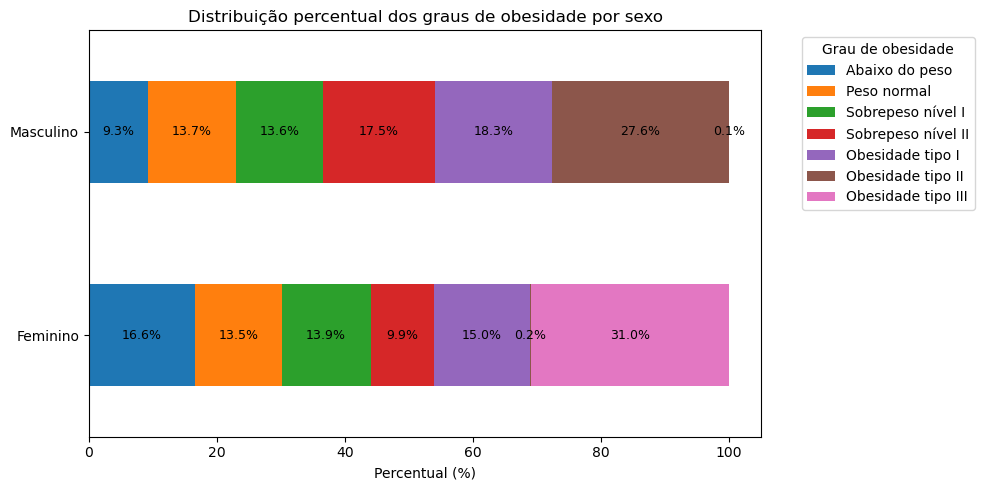

In [49]:

ax = analisa_variavel("gender").plot(
    kind="barh",
    stacked=True,
    figsize=(10, 5)
)

# rótulos percentuais
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.1f%%",
        label_type="center",
        fontsize=9
    )

ax.set_xlabel("Percentual (%)")
ax.set_ylabel("")
ax.legend(title="Grau de obesidade", bbox_to_anchor=(1.05, 1))

plt.title("Distribuição percentual dos graus de obesidade por sexo")
plt.tight_layout()
plt.show()


A análise por sexo revela padrões distintos de distribuição dos graus de obesidade.
No grupo feminino, observa-se uma polarização maior, com presença significativa tanto de indivíduos abaixo do peso quanto de obesidade severa (tipo III).

Entre os homens, a concentração se desloca para os níveis intermediários e altos de obesidade, com maior representatividade em sobrepeso nível II, obesidade tipo I e, principalmente, obesidade tipo II, sugerindo um acúmulo progressivo de peso em faixas menos extremas quando comparado ao grupo feminino.


### Como o histórico familiar influência a distribuição dos níveis de obesidade?

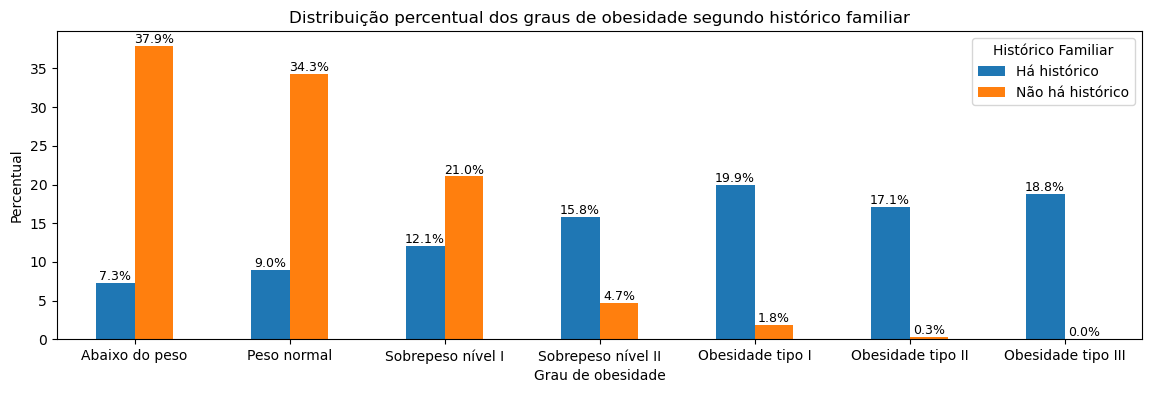

In [90]:
tabela = analisa_variavel("family_history")

ax = tabela.T.plot(kind="bar", figsize=(14,4))

plt.title("Distribuição percentual dos graus de obesidade segundo histórico familiar")
plt.ylabel("Percentual")
plt.xlabel("Grau de obesidade")
plt.legend(title="Histórico Familiar")
plt.xticks(rotation=0)

# adicionando os rótulos
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.1f%%",
        fontsize=9
    )

plt.show()


Ao analisar o histórico familiar, observa-se uma mudança clara no perfil de obesidade. Indivíduos com histórico apresentam maior concentração nos níveis mais elevados, enquanto aqueles sem histórico estão majoritariamente distribuídos entre peso normal e abaixo do peso


## A características alimentares

### Os níveis de obesidade mais severos podem estar associados ao consumo frequente de alimentos altamente calóricos?

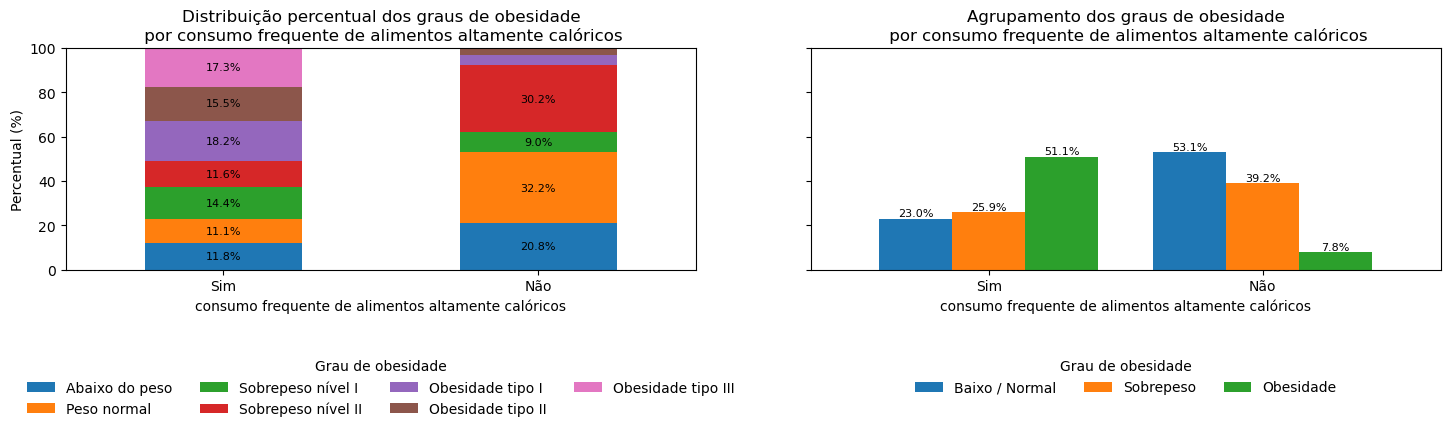

In [51]:
grafico.tabela = analisa_variavel("favc")
grafico.ordem = ["Sim", "Não"]
grafico.titulo = "consumo frequente de alimentos altamente calóricos"
grafico.gerar_graficos()

Observa-se uma associação clara entre o consumo frequente de alimentos altamente calóricos e a presença de níveis mais severos de obesidade. Enquanto indivíduos que não relatam consumo frequente concentram-se majoritariamente em peso normal e sobrepeso, aqueles que consomem com frequência apresentam distribuição progressivamente deslocada para obesidade tipo I, II e III, indicando maior severidade do quadro.

### Como o perfil de obesidade varia conforme a frequência de consumo de vegetais?

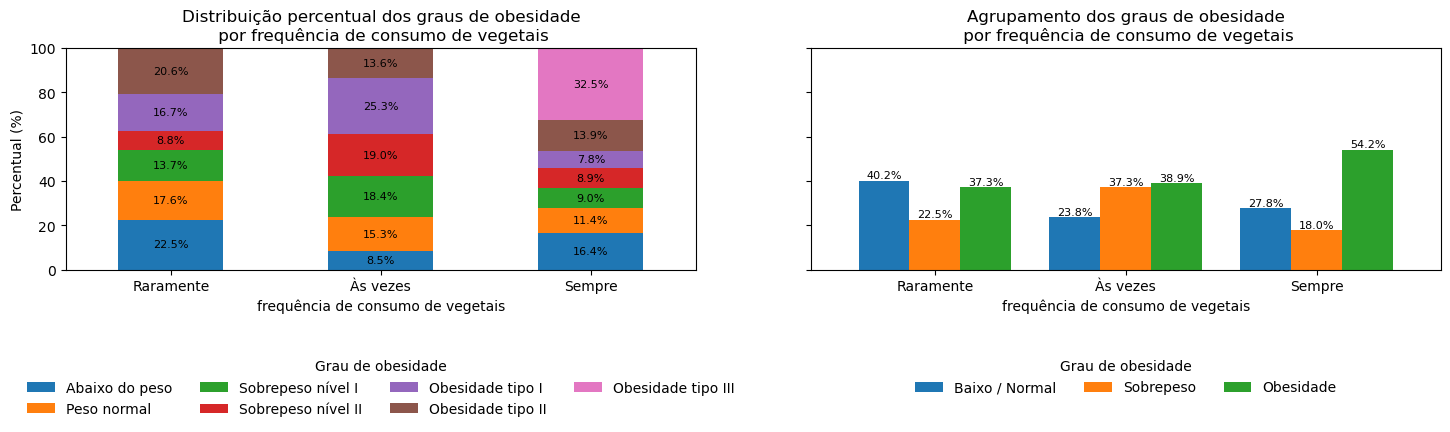

In [29]:
grafico.tabela = analisa_variavel("fcvc")
grafico.ordem = ["Raramente", "Às vezes", "Sempre"]
grafico.titulo = "frequência de consumo de vegetais"
grafico.gerar_graficos()

Ao analisar a distribuição percentual dos graus de obesidade segundo a frequência de consumo de vegetais, observa-se que os perfis variam significativamente entre os grupos.
Indivíduos que relatam consumir vegetais ‘às vezes’ apresentam maior concentração nos graus de sobrepeso e obesidade tipo I.
Já no grupo que consome vegetais ‘sempre’, nota-se uma presença relevante de obesidade tipo III, sugerindo que o consumo frequente, isoladamente, não é suficiente para explicar um perfil de peso mais saudável.
Categorias com 0% indicam ausência de registros na amostra.

### O número de refeições principais por dia está associado a diferenças no perfil de obesidade?

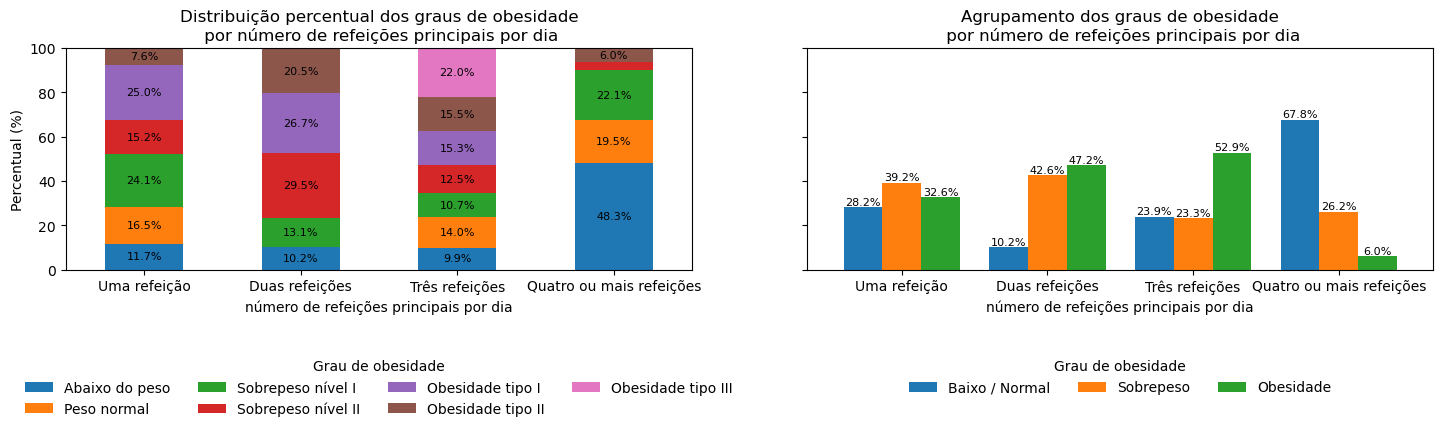

In [30]:
grafico.tabela = analisa_variavel("ncp")
grafico.ordem = ["Uma refeição","Duas refeições","Três refeições","Quatro ou mais refeições"]
grafico.titulo = "número de refeições principais por dia"
grafico.gerar_graficos()


A distribuição percentual dos níveis de obesidade varia de forma significativa conforme o número de refeições principais realizadas por dia.
Indivíduos que realizam apenas uma ou duas refeições concentram-se majoritariamente nos níveis de sobrepeso e obesidade, com destaque para sobrepeso nível II e obesidade tipo I.
No grupo que realiza três refeições diárias, observa-se uma distribuição mais equilibrada entre os níveis, porém com presença relevante de obesidade tipo III, indicando maior severidade nesse perfil.
Já entre aqueles que realizam quatro ou mais refeições, destaca-se a elevada participação de indivíduos abaixo do peso e peso normal, acompanhada de menor concentração nos níveis mais severos de obesidade.
Esses resultados sugerem uma associação entre o padrão de refeições diárias e o perfil de obesidade, reforçando a complexidade dos comportamentos alimentares e a impossibilidade de inferir causalidade direta.
Categorias com 0% indicam ausência de registros na amostra analisada.

### Consumir alimentos entre as refeições está associado a diferenças no perfil de peso?

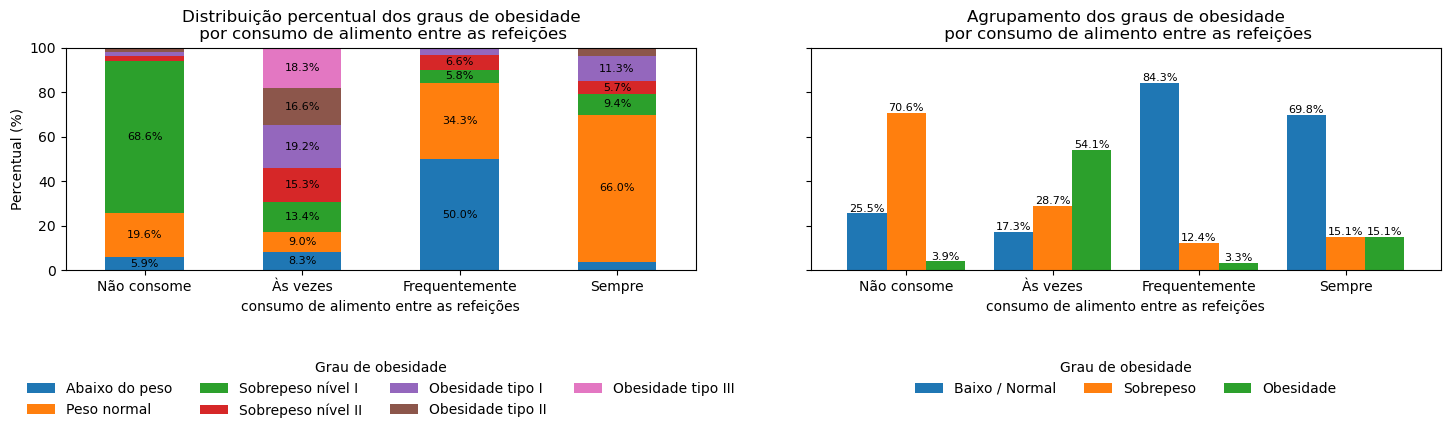

In [31]:
grafico.tabela = analisa_variavel("caec")
grafico.ordem = ["Não consome","Às vezes","Frequentemente","Sempre"]
grafico.titulo = "consumo de alimento entre as refeições"
grafico.gerar_graficos()

O gráfico evidencia que a frequência de consumo de alimentos entre as refeições está associada a diferentes perfis de obesidade. Indivíduos que consomem frequentemente ou sempre tendem a se concentrar nos grupos de peso normal e abaixo do peso, enquanto aqueles que não consomem apresentam maior predominância de sobrepeso nível I. Já o consumo ocasional mostra uma distribuição mais dispersa entre os níveis de obesidade, sugerindo um padrão alimentar menos regular e potencialmente menos favorável ao controle do peso.

## Estilo de Vida

### A prática regular de atividade física contribui para um melhor controle do peso corporal?

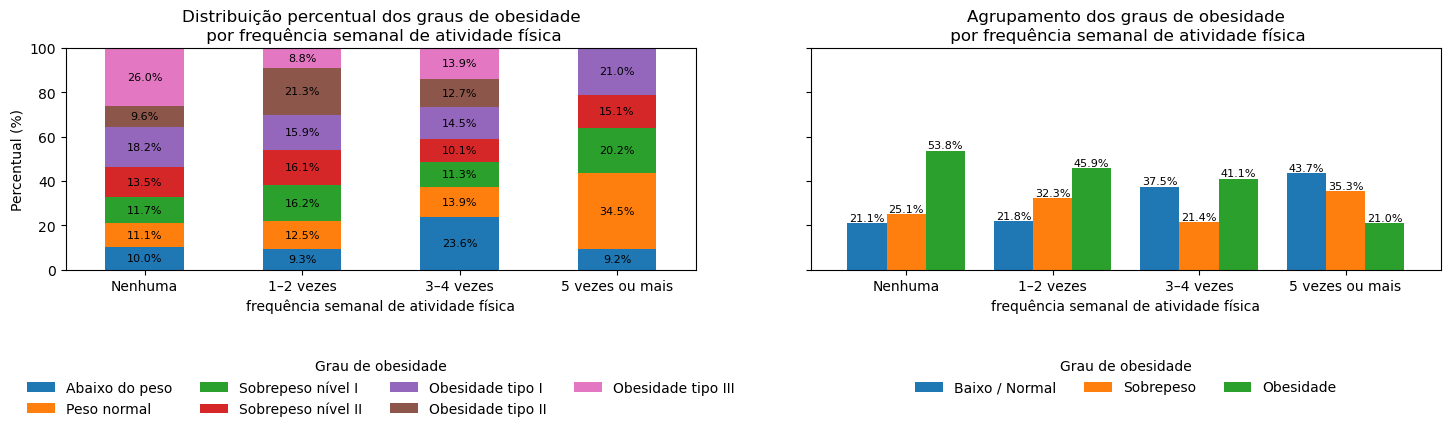

In [34]:
grafico.tabela = analisa_variavel("faf")
grafico.ordem = ["Nenhuma","1–2 vezes","3–4 vezes","5 vezes ou mais"]
grafico.titulo = "frequência semanal de atividade física"
grafico.gerar_graficos()

Os dados sugerem que maiores frequências de atividade física estão associadas a perfis de peso mais equilibrados, com maior concentração de indivíduos em peso normal entre aqueles que se exercitam regularmente. Em contraste, a ausência de atividade física está relacionada a uma distribuição mais ampla entre os níveis de sobrepeso e obesidade, incluindo graus mais severos. Esses padrões indicam que a prática regular de atividade física pode contribuir para um melhor controle do peso corporal.

### O tempo diário de uso de dispositivos eletrônicos influencia o controle do peso corporal?

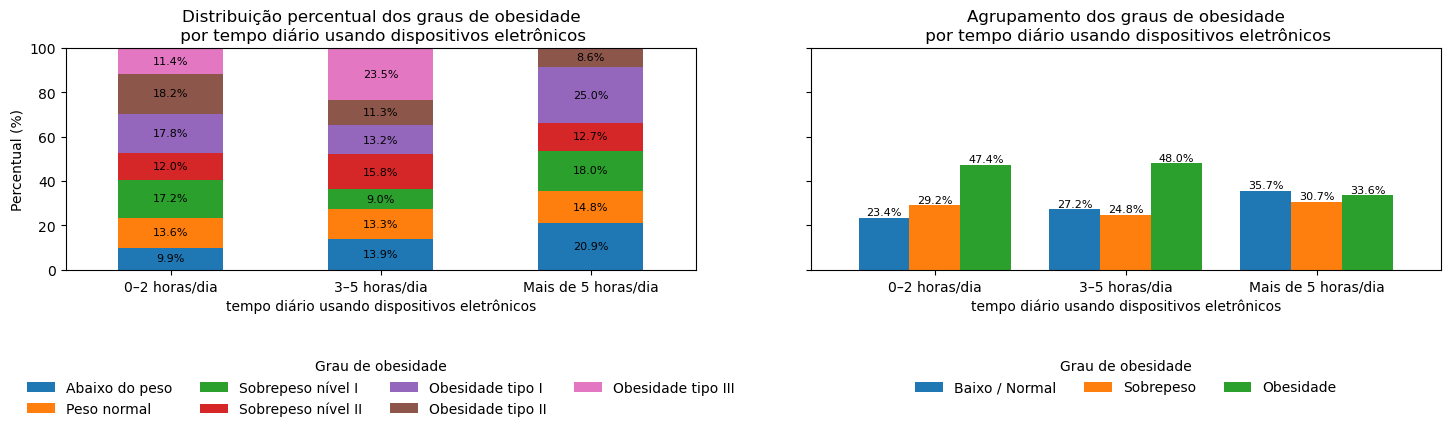

In [37]:
grafico.tabela = analisa_variavel("tue")
grafico.ordem = ["0–2 horas/dia","3–5 horas/dia","Mais de 5 horas/dia",]
grafico.titulo = "tempo diário usando dispositivos eletrônicos"
grafico.gerar_graficos()

### Existem diferenças no perfil de obesidade entre os meios de transporte habituais?

A pesquisa foi realizada com um público majoriamente usuários de transporte público e carro, talvez reagrupar entre ativo e motorizado para reduzir ruído e estabilizar os percentuais

In [ ]:
df_pesquisa.mtrans.value_counts()

mtrans
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

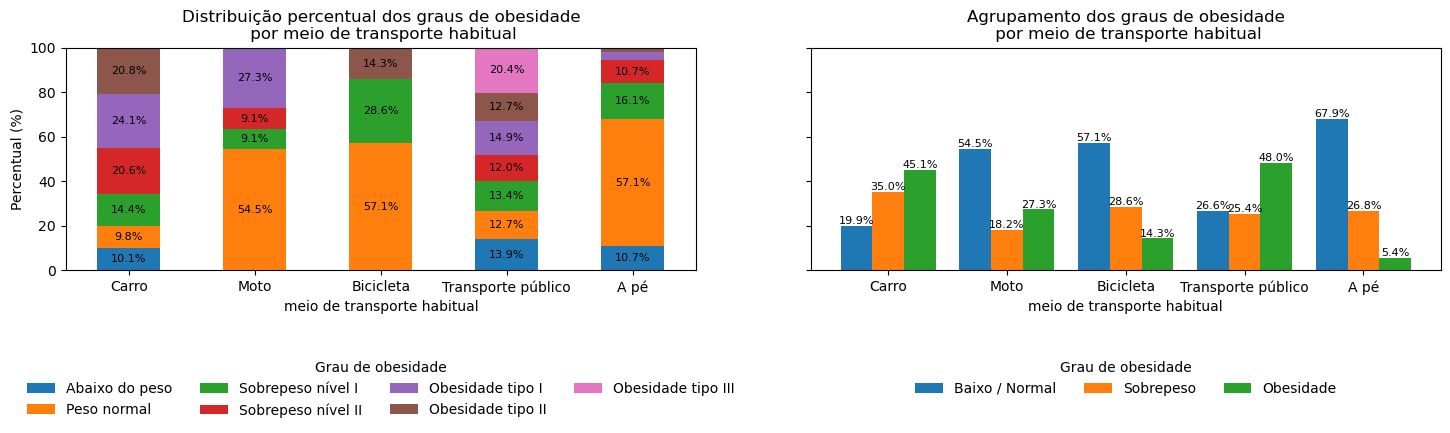

In [41]:
grafico.tabela = analisa_variavel("mtrans")
grafico.ordem = ["Carro","Moto","Bicicleta","Transporte público","A pé"]
grafico.titulo = "meio de transporte habitual"
grafico.gerar_graficos()

O gráfico sugere diferenças na distribuição dos níveis de obesidade entre os meios de transporte habituais. Observa-se que formas de deslocamento mais ativas, como caminhar e utilizar bicicleta, apresentam maior concentração de indivíduos em peso normal; entretanto, esses resultados devem ser interpretados com cautela devido à baixa representatividade dessas categorias na amostra. Em contraste, o uso de carro e transporte público, que concentram a maior parte dos indivíduos, apresenta uma distribuição mais equilibrada e consistente entre os diferentes níveis de obesidade. Assim, embora haja indícios de associação entre o tipo de transporte e o perfil de peso corporal, os dados não permitem afirmar que o uso de meios de transporte mais ativos contribui diretamente para um melhor controle do peso, sendo necessária a consideração de outras variáveis comportamentais.

## Comportamentos Adicionais

### A ingestão adequada de água contribui para um melhor controle do peso corporal?

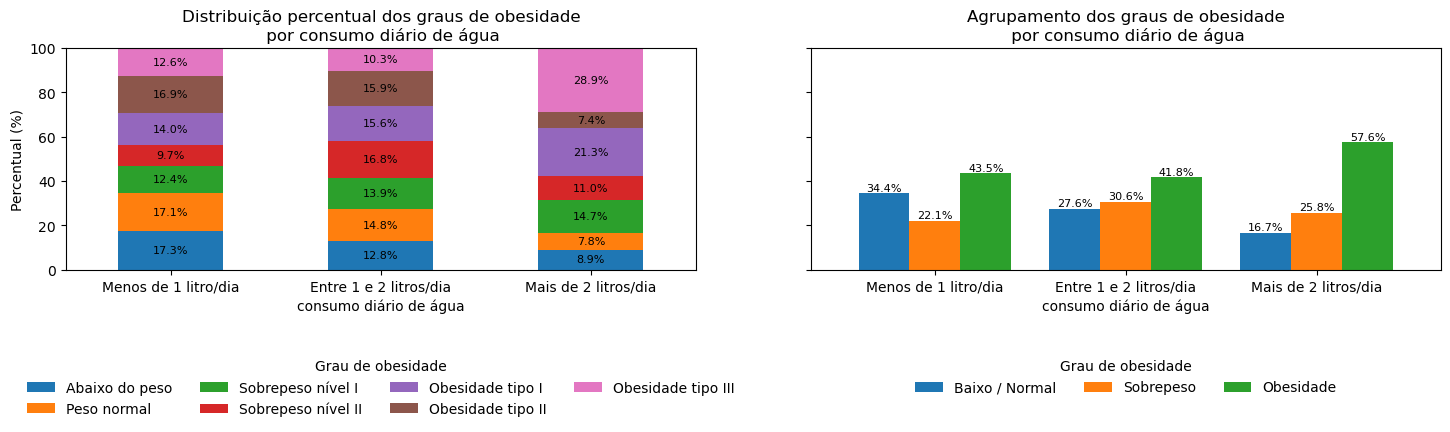

In [52]:
grafico.tabela = analisa_variavel("ch2o")
grafico.ordem = ["Menos de 1 litro/dia", "Entre 1 e 2 litros/dia", "Mais de 2 litros/dia"]
grafico.titulo = "consumo diário de água"
grafico.gerar_graficos()

O gráfico mostra que não há um padrão consistente entre o consumo diário de água e o controle do peso corporal. Os diferentes níveis de ingestão apresentam distribuições semelhantes entre os graus de obesidade, com presença relevante de sobrepeso e obesidade em todos os grupos. Embora alguns níveis de consumo concentrem maior proporção em categorias específicas, os resultados sugerem que a ingestão de água, de forma isolada, não explica diferenças claras no perfil de peso, indicando a influência de outros fatores comportamentais e de estilo de vida.


### A frequência de consumo de bebidas alcoólicas está associada a diferentes perfis de obesidade?

Aqui temos que tomar uma decisão, pois apenas 1 pessoa respondeu sempre, ou excluímos ou reagrupamos o "sempre"

In [75]:
df_pesquisa.calc.value_counts()

calc
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

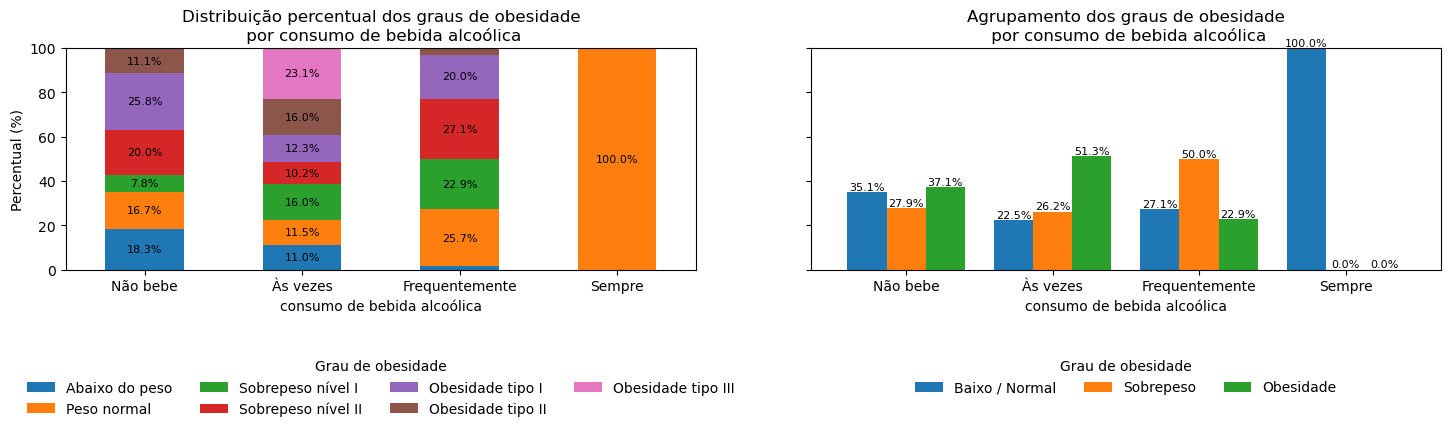

In [57]:
grafico.tabela = analisa_variavel("calc")
grafico.ordem = ["Não bebe","Às vezes","Frequentemente","Sempre"]
grafico.titulo = "consumo de bebida alcoólica"
grafico.gerar_graficos()

O gráfico mostra diferenças na distribuição dos níveis de obesidade entre as frequências de consumo de bebidas alcoólicas; no entanto, os resultados devem ser interpretados com cautela devido à forte desproporção entre os grupos, especialmente o grupo que consome bebidas alcoólicas sempre, representado por apenas um indivíduo. Observa-se que os grupos “frequentemente” e “às vezes” apresentam maior dispersão entre os níveis de sobrepeso e obesidade, enquanto o grupo “não bebe” concentra-se principalmente nos níveis intermediários. Dada a baixa representatividade de alguns grupos, os dados não permitem afirmar uma influência clara do consumo de álcool sobre o controle do peso corporal, sugerindo que outros fatores comportamentais podem estar envolvidos.

### Existem diferenças no perfil de obesidade entre fumantes e não fumantes?

A análise do hábito de fumar deve ser interpretada com cautela, devido à baixa representatividade de fumantes na amostra. Apenas ~2% da amostra são fummantes.


In [63]:
df_pesquisa.smoke.value_counts()

smoke
no     2067
yes      44
Name: count, dtype: int64

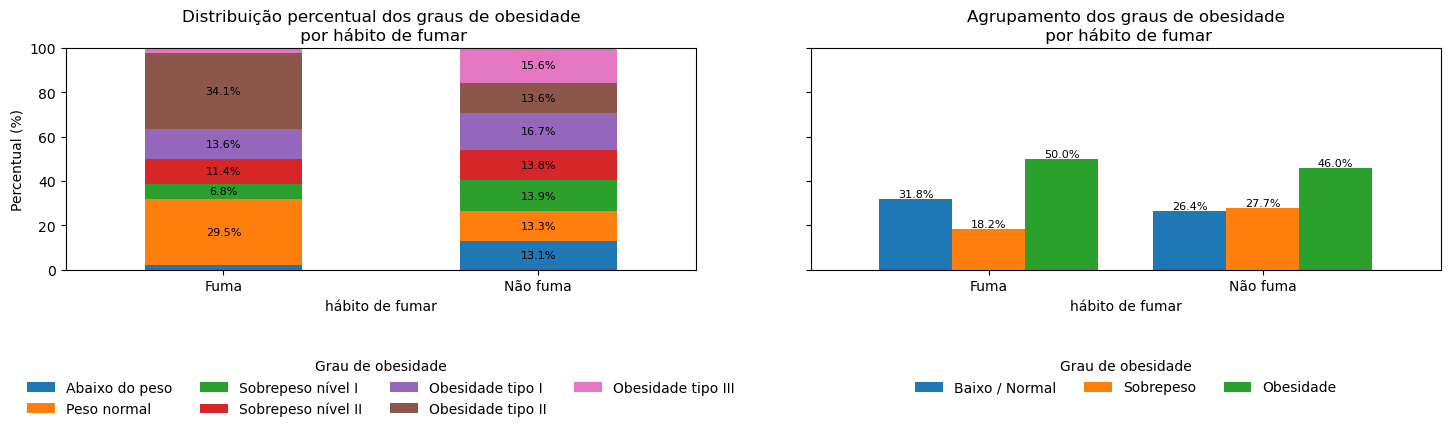

In [77]:
grafico.tabela = analisa_variavel("smoke")
grafico.ordem = ["Fuma", "Não fuma"]
grafico.titulo = "hábito de fumar"
grafico.gerar_graficos()

O gráfico apresenta diferenças na distribuição dos níveis de obesidade entre fumantes e não fumantes; no entanto, esses resultados devem ser interpretados com cautela devido à baixa representatividade do grupo de fumantes na amostra. Observa-se que, entre os fumantes, há maior concentração em obesidade tipo II, enquanto o grupo de não fumantes apresenta uma distribuição mais homogênea entre os diferentes níveis de obesidade. Dada a reduzida dimensão do grupo de fumantes, os percentuais observados podem ser fortemente influenciados por poucos indivíduos, não permitindo a identificação de um padrão consistente sobre a relação entre o hábito de fumar e o controle do peso corporal.

### Existe associação entre o monitoramento da ingestão calórica diária e os níveis de obesidade?

In [82]:
df_pesquisa.scc.value_counts()

scc
no     2015
yes      96
Name: count, dtype: int64

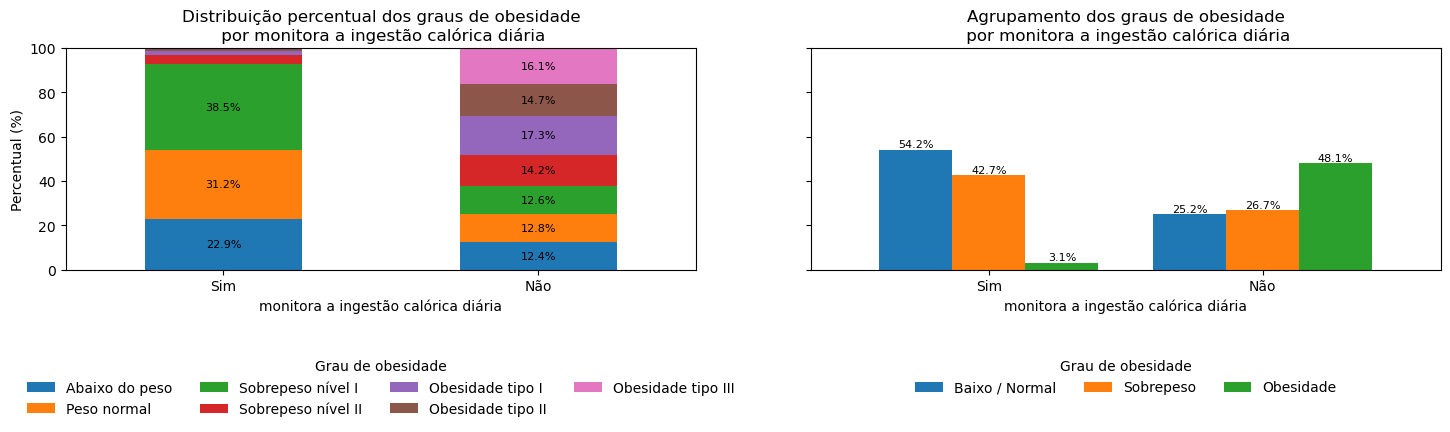

In [84]:
grafico.tabela = analisa_variavel("scc")
grafico.ordem = ["Sim", "Não"]
grafico.titulo = "monitora a ingestão calórica diária"
grafico.gerar_graficos()

Indivíduos que monitoram a ingestão calórica concentram-se nas categorias de peso mais favoráveis, com baixa presença nos níveis mais elevados de obesidade. Já entre os que não monitoram, a distribuição é mais homogênea, com maior participação nas faixas de sobrepeso e obesidade.
Esse padrão indica uma associação entre o monitoramento calórico e o controle do peso, embora não permita inferir causalidade devido à desproporção da amostra. Apenas 4,5% (96 pessoas) monitoram a ingestão de calorias diariamente.